In [1]:
import os
import random
import numpy as np
import tensorflow as tf

def seed_everything(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

seed_everything(42)  # Seed 고정

## 데이터 불러오기

In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('../ssd_data/imputated_data/imputated_data_MB1.csv')
# 'index' 컬럼을 datetime 형태로 변환
data['index'] = pd.to_datetime(data['index'])

data

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
0,2019-01-01,31346.0,100.0,0.0,97.0,12769.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.003245e+10,99.0,2.761588e+10,0.0
1,2019-01-02,31346.0,100.0,0.0,97.0,12792.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.058151e+10,99.0,2.778027e+10,0.0
2,2019-01-03,31346.0,100.0,0.0,97.0,12816.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.106840e+10,99.0,2.795260e+10,0.0
3,2019-01-04,31346.0,100.0,0.0,97.0,12840.0,99.0,13.0,99.0,32.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.144897e+10,99.0,2.812494e+10,0.0
4,2019-01-05,31346.0,100.0,0.0,97.0,12864.0,99.0,13.0,99.0,32.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.179422e+10,99.0,2.829816e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98919,2019-06-26,8599.0,100.0,0.0,96.0,17168.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201000e+12,99.0,8.356453e+11,0.0
98920,2019-06-27,8599.0,100.0,0.0,96.0,17192.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201312e+12,99.0,8.362658e+11,0.0
98921,2019-06-28,8599.0,100.0,0.0,96.0,17216.0,99.0,21.0,91.0,624.0,...,31.0,200.0,0.0,100.0,0.0,99.0,2.201585e+12,99.0,8.371074e+11,0.0
98922,2019-06-29,8599.0,99.0,2.0,96.0,17240.0,99.0,21.0,91.0,624.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201871e+12,99.0,8.379656e+11,0.0


In [7]:
data[data['disk_id']==31346.0]

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
0,2019-01-01,31346.0,100.0,0.0,97.0,12769.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.003245e+10,99.0,2.761588e+10,0.0
1,2019-01-02,31346.0,100.0,0.0,97.0,12792.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.058151e+10,99.0,2.778027e+10,0.0
2,2019-01-03,31346.0,100.0,0.0,97.0,12816.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.106840e+10,99.0,2.795260e+10,0.0
3,2019-01-04,31346.0,100.0,0.0,97.0,12840.0,99.0,13.0,99.0,32.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.144897e+10,99.0,2.812494e+10,0.0
4,2019-01-05,31346.0,100.0,0.0,97.0,12864.0,99.0,13.0,99.0,32.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.179422e+10,99.0,2.829816e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2019-06-26,31346.0,100.0,0.0,96.0,16992.0,99.0,13.0,99.0,59.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.064806e+11,99.0,4.539492e+10,0.0
177,2019-06-27,31346.0,100.0,0.0,96.0,17016.0,99.0,13.0,99.0,59.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.068361e+11,99.0,4.539960e+10,0.0
178,2019-06-28,31346.0,100.0,0.0,96.0,17040.0,99.0,13.0,99.0,59.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.071431e+11,99.0,4.540266e+10,0.0
179,2019-06-29,31346.0,100.0,0.0,96.0,17064.0,99.0,13.0,99.0,59.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.074411e+11,99.0,4.540474e+10,0.0


In [3]:
data[data['label']==1]["disk_id"].nunique

<bound method IndexOpsMixin.nunique of 55024    32240.0
55205    17909.0
55358    44290.0
55431     8656.0
55613    12584.0
          ...   
98229    40280.0
98410    37897.0
98560    21058.0
98741    28019.0
98923     8599.0
Name: disk_id, Length: 304, dtype: float64>

In [4]:
# 라벨이 1인 행을 필터링합니다.
selected_disk_model_1 = data[data['label'] == 1]

# 모델, disk_id, 그리고 날짜 순으로 정렬합니다.
selected_disk_model_1 = selected_disk_model_1.sort_values(by=['disk_id', 'index'])

# disk_id와 model 열만을 선택하여 새로운 데이터 프레임에 저장합니다.
selected_disk_model_1 = selected_disk_model_1[['disk_id']].drop_duplicates().reset_index(drop=True)

to_delete_id =[]
for disk_id in list(selected_disk_model_1.values.squeeze()):
    disk_data = data[data['disk_id'] == disk_id].copy()
    disk_data = disk_data.sort_values(by='index')

    failed_index = disk_data[disk_data['label']==1]['index'].index.min()
    start_index = disk_data.index.min()

    if(failed_index - start_index) < 30:
        to_delete_id.append(disk_id)

# failed_disk_ids에 해당하는 행들을 제거
data = data[~data['disk_id'].isin(to_delete_id)]
data

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
0,2019-01-01,31346.0,100.0,0.0,97.0,12769.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.003245e+10,99.0,2.761588e+10,0.0
1,2019-01-02,31346.0,100.0,0.0,97.0,12792.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.058151e+10,99.0,2.778027e+10,0.0
2,2019-01-03,31346.0,100.0,0.0,97.0,12816.0,99.0,13.0,99.0,31.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.106840e+10,99.0,2.795260e+10,0.0
3,2019-01-04,31346.0,100.0,0.0,97.0,12840.0,99.0,13.0,99.0,32.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.144897e+10,99.0,2.812494e+10,0.0
4,2019-01-05,31346.0,100.0,0.0,97.0,12864.0,99.0,13.0,99.0,32.0,...,28.0,200.0,0.0,100.0,0.0,99.0,3.179422e+10,99.0,2.829816e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98919,2019-06-26,8599.0,100.0,0.0,96.0,17168.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201000e+12,99.0,8.356453e+11,0.0
98920,2019-06-27,8599.0,100.0,0.0,96.0,17192.0,99.0,21.0,91.0,623.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201312e+12,99.0,8.362658e+11,0.0
98921,2019-06-28,8599.0,100.0,0.0,96.0,17216.0,99.0,21.0,91.0,624.0,...,31.0,200.0,0.0,100.0,0.0,99.0,2.201585e+12,99.0,8.371074e+11,0.0
98922,2019-06-29,8599.0,99.0,2.0,96.0,17240.0,99.0,21.0,91.0,624.0,...,30.0,200.0,0.0,100.0,0.0,99.0,2.201871e+12,99.0,8.379656e+11,0.0


In [5]:
# 라벨이 1인 행을 필터링합니다.
selected_disk_model_1 = data[data['label'] == 1]

# 모델, disk_id, 그리고 날짜 순으로 정렬합니다.
selected_disk_model_1 = selected_disk_model_1.sort_values(by=['disk_id', 'index'])

# disk_id와 model 열만을 선택하여 새로운 데이터 프레임에 저장합니다.
selected_disk_model_1 = selected_disk_model_1[['disk_id']].drop_duplicates().reset_index(drop=True)

# 결과 데이터 프레임을 출력합니다.
selected_disk_model_1.shape

(242, 1)

In [6]:
# disk_ids 데이터프레임에 있는 disk_id와 일치하는 행을 data 데이터프레임에서 불러옴
selected_label_1 = data[data['disk_id'].isin(selected_disk_model_1['disk_id'])]

# ds 컬럼에 따라 정렬
selected_label_1 = selected_label_1.sort_values(by=['disk_id','index'])
# 결과 출력
selected_label_1

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
72748,2019-01-01,470.0,99.0,4.0,97.0,14280.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.543009e+09,0.0
72749,2019-01-02,470.0,99.0,4.0,97.0,14304.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.544827e+09,0.0
72750,2019-01-03,470.0,99.0,4.0,97.0,14328.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.546758e+09,0.0
72751,2019-01-04,470.0,99.0,4.0,97.0,14352.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.548679e+09,0.0
72752,2019-01-05,470.0,99.0,4.0,97.0,14376.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.550465e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66770,2019-06-26,44338.0,99.0,2.0,96.0,18504.0,99.0,21.0,99.0,9.0,...,30.0,200.0,0.0,100.0,0.0,99.0,1.395901e+10,99.0,9.413844e+09,0.0
66771,2019-06-27,44338.0,99.0,2.0,96.0,18528.0,99.0,21.0,99.0,9.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.395920e+10,99.0,9.413844e+09,0.0
66772,2019-06-28,44338.0,99.0,2.0,96.0,18552.0,99.0,21.0,99.0,9.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.396014e+10,99.0,9.413844e+09,0.0
66773,2019-06-29,44338.0,99.0,2.0,96.0,18576.0,99.0,21.0,99.0,9.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.396116e+10,99.0,9.413844e+09,0.0


In [7]:
remove_indexes = []
for index, row in selected_label_1.iterrows():
    if row['label'] == 1:
        disk_id = row['disk_id']
        ds = row['index']
        remove_indexes.extend(selected_label_1.index[(selected_label_1['disk_id'] == disk_id) & (selected_label_1['index'] > ds)].tolist())

# 중복된 인덱스를 제거하여 제거할 행들을 구함
remove_indexes = list(set(remove_indexes))

# 제거할 행을 제외한 최종 DataFrame을 생성
del_fail_after_row = selected_label_1.drop(index=remove_indexes)

# 결과 출력
del_fail_after_row

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
72748,2019-01-01,470.0,99.0,4.0,97.0,14280.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.543009e+09,0.0
72749,2019-01-02,470.0,99.0,4.0,97.0,14304.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.544827e+09,0.0
72750,2019-01-03,470.0,99.0,4.0,97.0,14328.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.546758e+09,0.0
72751,2019-01-04,470.0,99.0,4.0,97.0,14352.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.548679e+09,0.0
72752,2019-01-05,470.0,99.0,4.0,97.0,14376.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.550465e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66673,2019-03-21,44338.0,99.0,2.0,96.0,16176.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.778025e+09,0.0
66674,2019-03-22,44338.0,99.0,2.0,96.0,16200.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.779657e+09,0.0
66675,2019-03-23,44338.0,99.0,2.0,96.0,16224.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.781085e+09,0.0
66676,2019-03-24,44338.0,99.0,2.0,96.0,16248.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.782419e+09,0.0


In [8]:
del_fail_after_row[del_fail_after_row['label']==1]

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
72831,2019-03-25,470.0,99.0,4.0,96.0,16270.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383236e+10,99.0,8.754062e+09,1.0
72981,2019-03-25,476.0,99.0,28.0,96.0,16270.0,99.0,18.0,99.0,9.0,...,29.0,1.0,229624.0,100.0,0.0,99.0,1.462815e+10,99.0,9.449033e+09,1.0
88133,2019-06-03,531.0,99.0,2.0,96.0,18442.0,99.0,20.0,95.0,302.0,...,29.0,200.0,0.0,100.0,0.0,99.0,9.601957e+11,99.0,1.282129e+12,1.0
94788,2019-06-19,601.0,99.0,2.0,96.0,17198.0,99.0,18.0,96.0,294.0,...,27.0,200.0,0.0,100.0,0.0,99.0,9.471115e+11,99.0,7.726569e+11,1.0
87809,2019-06-02,609.0,99.0,2.0,96.0,16790.0,99.0,18.0,93.0,464.0,...,27.0,200.0,0.0,100.0,0.0,99.0,1.617740e+12,99.0,8.470846e+11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92574,2019-06-14,43760.0,99.0,2.0,96.0,17077.0,99.0,22.0,96.0,297.0,...,29.0,200.0,0.0,100.0,0.0,99.0,9.442776e+11,99.0,7.580073e+11,1.0
77346,2019-05-07,44325.0,99.0,2.0,96.0,16165.0,99.0,18.0,96.0,293.0,...,27.0,200.0,0.0,100.0,0.0,99.0,9.154898e+11,99.0,7.371895e+11,1.0
96058,2019-06-22,44330.0,99.0,2.0,96.0,17269.0,99.0,18.0,91.0,612.0,...,27.0,200.0,0.0,100.0,0.0,99.0,2.214436e+12,99.0,8.346579e+11,1.0
68849,2019-03-25,44335.0,99.0,2.0,96.0,16272.0,99.0,21.0,99.0,7.0,...,30.0,200.0,0.0,100.0,0.0,99.0,1.381631e+10,99.0,8.605756e+09,1.0


In [9]:
import pandas as pd

# 모든 행에 대해 반복
for index, row in del_fail_after_row.iterrows():
    # label 값이 1인 경우
    if row['label'] == 1:
        # 해당 행의 disk_id
        current_disk_id = row['disk_id']
        # 해당 행의 날짜
        current_date = row['index']
        # 30일 이전의 날짜 계산
        days_before = current_date - pd.Timedelta(days=30)
        
        # 같은 disk_id이면서, 날짜가 30일 이내인 행들을 찾아서 label 값을 1로 설정
        del_fail_after_row.loc[(del_fail_after_row['disk_id'] == current_disk_id) &
                             (del_fail_after_row['index'] <= current_date) &
                             (del_fail_after_row['index'] > days_before), 'label'] = 1

del_fail_after_row

,index,disk_id,n_5,r_5,n_9,r_9,n_12,r_12,n_177,r_177,...,r_194,n_195,r_195,n_199,r_199,n_241,r_241,n_242,r_242,label
72748,2019-01-01,470.0,99.0,4.0,97.0,14280.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.543009e+09,0.0
72749,2019-01-02,470.0,99.0,4.0,97.0,14304.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.544827e+09,0.0
72750,2019-01-03,470.0,99.0,4.0,97.0,14328.0,99.0,18.0,99.0,7.0,...,28.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.546758e+09,0.0
72751,2019-01-04,470.0,99.0,4.0,97.0,14352.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.548679e+09,0.0
72752,2019-01-05,470.0,99.0,4.0,97.0,14376.0,99.0,18.0,99.0,7.0,...,29.0,200.0,0.0,100.0,0.0,99.0,1.383233e+10,99.0,8.550465e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66673,2019-03-21,44338.0,99.0,2.0,96.0,16176.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.778025e+09,1.0
66674,2019-03-22,44338.0,99.0,2.0,96.0,16200.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.779657e+09,1.0
66675,2019-03-23,44338.0,99.0,2.0,96.0,16224.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.781085e+09,1.0
66676,2019-03-24,44338.0,99.0,2.0,96.0,16248.0,99.0,21.0,99.0,6.0,...,31.0,200.0,0.0,100.0,0.0,99.0,1.352326e+10,99.0,8.782419e+09,1.0


In [10]:
label_1 = selected_disk_model_1[['disk_id']].drop_duplicates().reset_index(drop=True)
label_1

,disk_id
0,470.0
1,476.0
2,531.0
3,601.0
4,609.0
...,...
237,43760.0
238,44325.0
239,44330.0
240,44335.0


In [11]:
import numpy as np
def create_sequences(data, window_size):
    X = []
    y = []

    # 각 disk_id에 대해 처리
    for disk_id in data['disk_id'].unique():
        disk_data = data[data['disk_id'] == disk_id].sort_values('index')  # index로 정렬
        disk_values = disk_data.drop(columns=['disk_id', 'index']).values  # 'disk_id'와 'index' 컬럼을 제외하고 numpy array로 변환

        # 이 disk_id에 대해 시퀀스 생성
        for i in range(len(disk_values) - window_size):
            X.append(disk_values[i:i + window_size, :-1])  # 마지막 차원은 특성(feature)을 의미합니다. 마지막 열('fail')을 제외합니다.
            y.append(disk_values[i + window_size -1, -1])  # 예를 들어 'fail' 상태가 마지막 특성일 경우입니다.

    return np.array(X), np.array(y)

## dataset 만들기

In [12]:
disk_list = list(data['disk_id'].drop_duplicates())
failure_disk_list = list(label_1.values.squeeze())
healthy_disk_list = list(set(disk_list) - set(failure_disk_list))

In [13]:
import random
random.seed(42)

# 194개씩 랜덤하게 선택
healthy_disk_194 = random.sample(healthy_disk_list, 194)
failure_disk_194 = random.sample(failure_disk_list, 194)

print(len(healthy_disk_194))
print(len(failure_disk_194))

# 194개에서 155/39 개로 validation set 구축
healthy_disk_155 = random.sample(healthy_disk_194,155) #train set
healthy_disk_39 = list(set(healthy_disk_194) - set(healthy_disk_155)) #validation set

failure_disk_155 = random.sample(failure_disk_194, 155) #train set
failure_disk_39 = list(set(failure_disk_194) - set(failure_disk_155)) #validation set

print('train_healthy_count:', len(healthy_disk_155))
print('train_failure_count:', len(failure_disk_155))

print('val_healthy_count:', len(healthy_disk_39))
print('val_failure_count:',len(failure_disk_39))
# 48개씩 랜덤하게 선택
healthy_disk_48 = random.sample(list(set(healthy_disk_list) - set(healthy_disk_194)), 48)
failure_disk_48 = list(set(failure_disk_list) - set(failure_disk_194))

print('test_healthy_count:',len(healthy_disk_48))
print('test_healthy_count:',len(failure_disk_48))

194
194
train_healthy_count: 155
train_failure_count: 155
val_healthy_count: 39
val_failure_count: 39
test_healthy_count: 48
test_healthy_count: 48


In [14]:
H_disk_194 = data[data['disk_id'].isin(healthy_disk_194)]
F_disk_194 = del_fail_after_row[del_fail_after_row['disk_id'].isin(failure_disk_194)]

H_disk_155 = data[data['disk_id'].isin(healthy_disk_155)]
F_disk_155 = del_fail_after_row[del_fail_after_row['disk_id'].isin(failure_disk_155)]

H_disk_39 = data[data['disk_id'].isin(healthy_disk_39)]
F_disk_39 = del_fail_after_row[del_fail_after_row['disk_id'].isin(failure_disk_39)]

H_disk_48 = data[data['disk_id'].isin(healthy_disk_48)]
F_disk_48 = del_fail_after_row[del_fail_after_row['disk_id'].isin(failure_disk_48)]

# train set, validation set, test set 생성
final_train_set = pd.concat([H_disk_194,F_disk_194],ignore_index=True,axis=0) #validation set으로 최적의 epoch 찾은 후, 해당 epoch으로 다시 training 시킬 예정
train_set = pd.concat([H_disk_155,F_disk_155],ignore_index=True,axis=0)
val_set = pd.concat([H_disk_39,F_disk_39],ignore_index=True,axis=0)
test_set = pd.concat([H_disk_48,F_disk_48],ignore_index=True,axis=0)

In [15]:
# feature와 label 구분
final_X_train = final_train_set.drop(columns=['disk_id','index','label'])
X_train = train_set.drop(columns=['disk_id','index','label'])
X_val = val_set.drop(columns=['disk_id','index','label'])
X_test = test_set.drop(columns=['disk_id','index','label'])

final_y_train = final_train_set['label']
y_train = train_set['label']
y_val = val_set['label']
y_test = test_set['label']

## LSTM

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)

# Assuming 'X_train' is the original DataFrame before scaling and its columns are to be preserved
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

train_scaled = pd.concat([train_set[['disk_id','index']],X_train_scaled_df, y_train], axis=1)
val_scaled = pd.concat([val_set[['disk_id','index']],X_val_scaled_df, y_val], axis=1)

In [22]:
window_size = 30 # 10일을 window로 설정합니다.
X_train_window, y_trian_window = create_sequences(train_scaled, window_size)
X_val_window, y_val_window = create_sequences(val_scaled, window_size)

print(X_train_window.shape)
print(X_val_window.shape)

print(y_trian_window.shape)
print(y_val_window.shape)

(36542, 30, 32)
(8961, 30, 32)
(36542,)
(8961,)


In [23]:
# 라이브러리 임포트
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
from keras import regularizers

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(30, 32)))  # n_features는 특성의 수
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

model.summary()

# 학습
history = model.fit(X_train_window,y_trian_window, validation_data=(X_val_window, y_val_window),epochs=7, verbose=1,batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9409 (36.75 KB)
Trainable params: 9409 (36.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/7
1142/1142 [==============================] - 10s 8ms/step - loss: 0.3423 - acc: 0.8851 - val_loss: 0.7115 - val_acc: 0.8839
Epoch 2/7
1142/1142 [==============================] - 8s 7ms/step - loss: 0.3203 - acc: 0.8866 - val_loss: 2255.4834 - val_acc: 0.8857
Epoch 3/7
1142

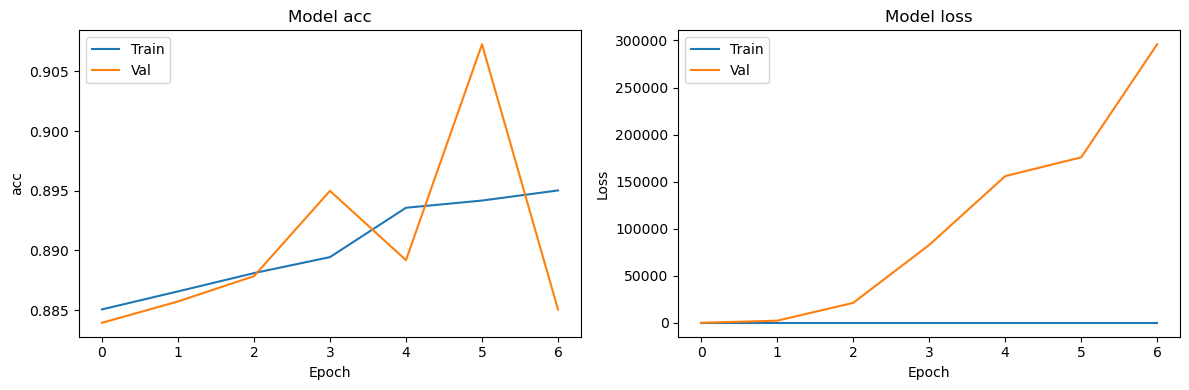

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation acc values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

- epoch : 7 에서 최적의 모델 구축가능하다고 판단
- final_X_train(194/194)에 대해서 7 epoch만큼 학습

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(final_X_train)

final_X_train_scaled=scaler.transform(final_X_train)
X_test_scaled=scaler.transform(X_test)

# Assuming 'final_X_train' is the original DataFrame before scaling and its columns are to be preserved
final_X_train_scaled_df = pd.DataFrame(final_X_train_scaled, columns=final_X_train.columns, index=final_X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

final_train_scaled = pd.concat([final_train_set[['disk_id','index']],final_X_train_scaled_df, final_y_train], axis=1)
test_scaled = pd.concat([test_set[['disk_id','index']],X_test_scaled_df, y_test], axis=1)

In [26]:
window_size = 30 # 10일을 window로 설정합니다.
final_X_train_window, final_y_trian_window = create_sequences(final_train_scaled, window_size)
X_test_window, y_test_window = create_sequences(test_scaled, window_size)

print(final_X_train_window.shape)
print(X_test_window.shape)

print(final_y_trian_window.shape)
print(y_test_window.shape)

(45503, 30, 32)
(11533, 30, 32)
(45503,)
(11533,)


In [28]:
# 라이브러리 임포트
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
from keras import regularizers

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(30, 32)))  # n_features는 특성의 수
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

model.summary()

# 학습
history = model.fit(final_X_train_window,final_y_trian_window,epochs=1, verbose=1,batch_size=32)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9409 (36.75 KB)
Trainable params: 9409 (36.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1422/1422 [==============================] - 11s 7ms/step - loss: 0.3490 - acc: 0.8847


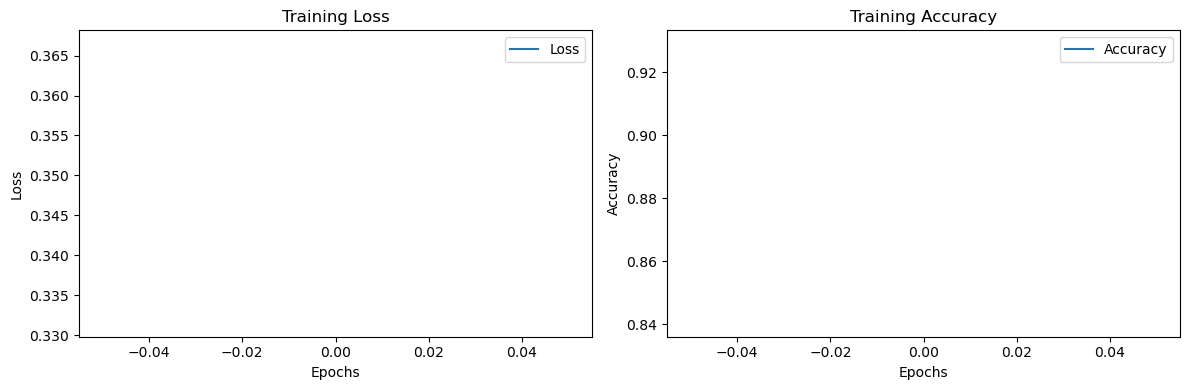

In [29]:
import matplotlib.pyplot as plt

# 훈련 손실과 정확도 그리기
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
model.evaluate(X_test_window,y_test_window)

361/361 [==============================] - 1s 3ms/step - loss: 0.3441 - acc: 0.8816


[0.34408968687057495, 0.8816439509391785]

In [31]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.
y_pred = np.round(y_pred) # 이진 분류 문제의 경우, 출력값을 반올림하여 0 또는 1로 변환

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'F1 Score: {f1}')

361/361 [==============================] - 1s 3ms/step
F1 Score: 0.49870395799678185


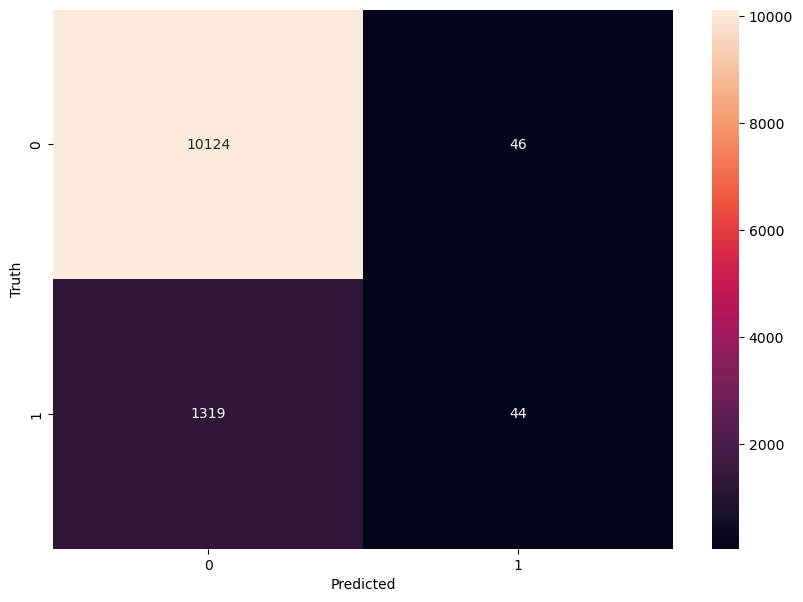

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [33]:
print(y_test_window.shape)

count_ones = np.count_nonzero(y_test_window == 1)

print("Number of ones in y_test_window:", count_ones)

(11533,)
Number of ones in y_test_window: 1363


361/361 [==============================] - 1s 3ms/step


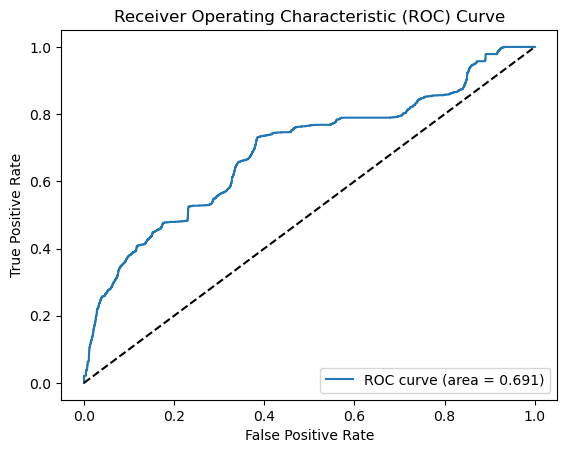

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브를 그리기 위한 점들을 출력합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 기준선 (diagonal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# 이진 분류 문제의 경우, 임계값 0.3으로 설정하여 예측값을 0 또는 1로 변환
y_pred = (y_pred > 0.35).astype(int)

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'Macro F1 Score: {f1}')

361/361 [==============================] - 1s 3ms/step
Macro F1 Score: 0.6254830485036029


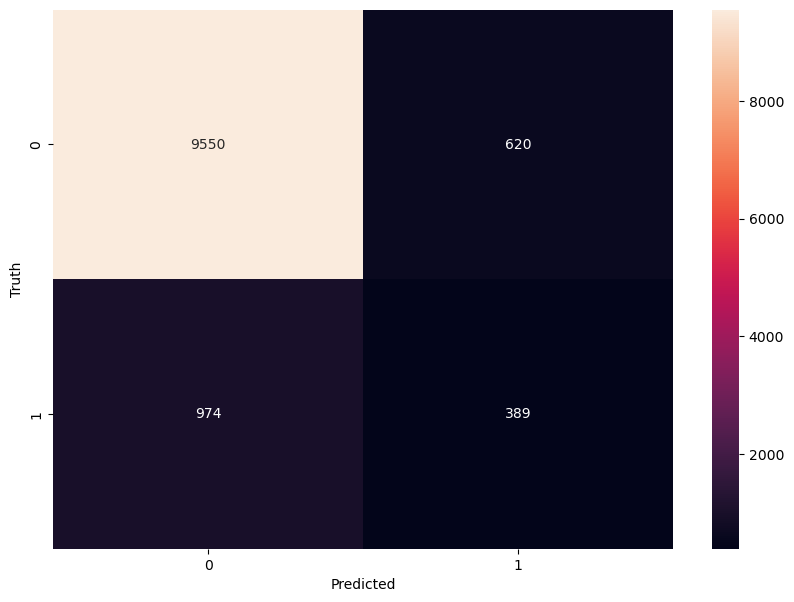

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [38]:
from numpy import argmax
from sklearn.metrics import roc_curve, classification_report

# 예측 확률 계산
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)

# Youden's J 통계를 사용하여 최적의 임계값 찾기
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f, Sensitivity=%.3f, Specificity=%.3f, J=%.3f' % (best_thresh, tpr[ix], 1-fpr[ix], J[ix]))

# 최적의 임계값을 사용하여 예측 수행
y_pred_class = (y_pred >= best_thresh).astype('int')

# 분류 보고서 출력
print(classification_report(y_test_window, y_pred_class, target_names=['healthy', 'failure']))

361/361 [==============================] - 1s 4ms/step
Best Threshold=0.140591, Sensitivity=0.731, Specificity=0.615, J=0.346
              precision    recall  f1-score   support

     healthy       0.94      0.62      0.75     10170
     failure       0.20      0.73      0.32      1363

    accuracy                           0.63     11533
   macro avg       0.57      0.67      0.53     11533
weighted avg       0.86      0.63      0.69     11533



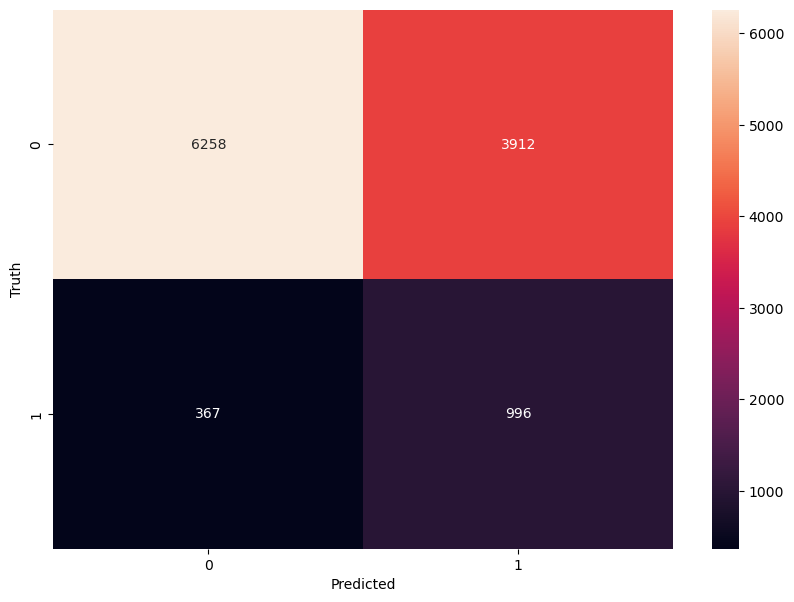

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred_class)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Conv 1D + LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)

# Assuming 'X_train' is the original DataFrame before scaling and its columns are to be preserved
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

train_scaled = pd.concat([train_set[['disk_id','index']],X_train_scaled_df, y_train], axis=1)
val_scaled = pd.concat([val_set[['disk_id','index']],X_val_scaled_df, y_val], axis=1)

In [ ]:
window_size = 30 # 10일을 window로 설정합니다.
X_train_window, y_trian_window = create_sequences(train_scaled, window_size)
X_val_window, y_val_window = create_sequences(val_scaled, window_size)

print(X_train_window.shape)
print(X_val_window.shape)

print(y_trian_window.shape)
print(y_val_window.shape)

(36542, 30, 32)
(8961, 30, 32)
(36542,)
(8961,)


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

# 모델 정의
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'), input_shape=(None,10, 32)))
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu')))
#model_cnn_lstm.add(TimeDistributed(Dropout(0.5)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(32, activation='relu'))
model_cnn_lstm.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model_cnn_lstm.add(Dropout(0.5))
model_cnn_lstm.add(Dense(1, activation='sigmoid'))


# 모델 컴파일
model_cnn_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn_lstm.summary()

# 학습
model_cnn_lstm_history = model_cnn_lstm.fit(X_train_window,y_trian_window, validation_data=(X_val_window, y_val_window),epochs=7, verbose=1,batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9409 (36.75 KB)
Trainable params: 9409 (36.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/7
1142/1142 [==============================] - 10s 8ms/step - loss: 0.3423 - acc: 0.8851 - val_loss: 0.7115 - val_acc: 0.8839
Epoch 2/7
1142/1142 [==============================] - 8s 7ms/step - loss: 0.3203 - acc: 0.8866 - val_loss: 2255.4834 - val_acc: 0.8857
Epoch 3/7
1142

In [370]:
window_size = 90 # 90일을 window로 설정합니다.
X_train_window, y_trian_window = create_sequences(train_scaled, window_size)
X_test_window, y_test_window = create_sequences(test_scaled, window_size)

print(X_train_window.shape)
print(X_test_window.shape)

print(y_trian_window.shape)
print(y_test_window.shape)


(19167, 90, 32)
(6031, 90, 32)
(19167,)
(6031,)


In [371]:
X_train_window = X_train_window.reshape(X_train_window.shape[0], 3, 30, X_train_window.shape[2])
X_test_window = X_test_window.reshape(X_test_window.shape[0], 3, 30, X_test_window.shape[2])

In [372]:
print(X_train_window.shape)
print(X_test_window.shape)

(19167, 3, 30, 32)
(6031, 3, 30, 32)


In [373]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

# 모델 정의
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'), input_shape=(None,30, 32)))
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu')))
#model_cnn_lstm.add(TimeDistributed(Dropout(0.5)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(32, activation='relu'))
model_cnn_lstm.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model_cnn_lstm.add(Dropout(0.5))
model_cnn_lstm.add(Dense(1, activation='sigmoid'))


# 모델 컴파일
model_cnn_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn_lstm.summary()

# 학습
model_cnn_lstm_history = model_cnn_lstm.fit(X_train_window,y_trian_window, epochs=15, verbose=1,batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_126 (TimeD  (None, None, 28, 16)     1552      
 istributed)                                                     
                                                                 
 time_distributed_127 (TimeD  (None, None, 26, 32)     1568      
 istributed)                                                     
                                                                 
 time_distributed_128 (TimeD  (None, None, 13, 32)     0         
 istributed)                                                     
                                                                 
 time_distributed_129 (TimeD  (None, None, 416)        0         
 istributed)                                                     
                                                                 
 lstm_48 (LSTM)              (None, 32)               

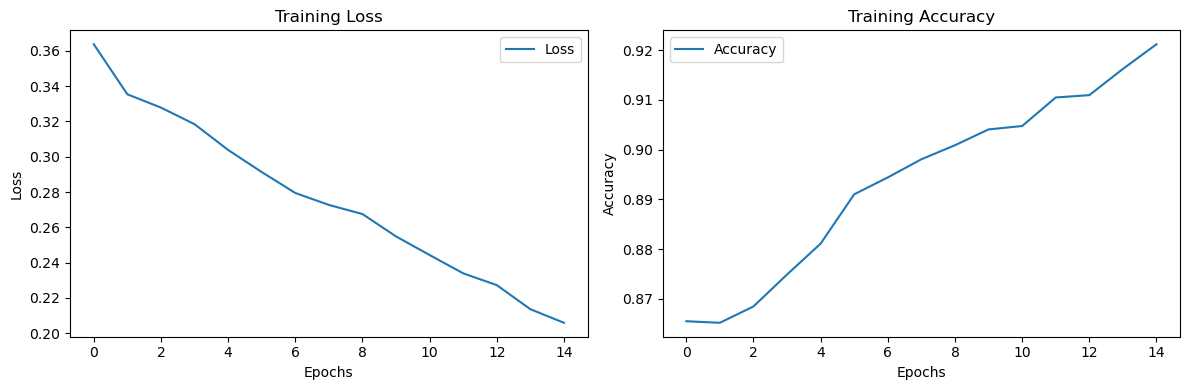

In [374]:
import matplotlib.pyplot as plt

# 훈련 손실과 정확도 그리기
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(model_cnn_lstm_history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_cnn_lstm_history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [375]:
model_cnn_lstm.evaluate(X_test_window,y_test_window)

189/189 [==============================] - 1s 3ms/step - loss: 0.3717 - accuracy: 0.8819


[0.3716904819011688, 0.8819432854652405]

In [376]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model_cnn_lstm.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.
y_pred = np.round(y_pred) # 이진 분류 문제의 경우, 출력값을 반올림하여 0 또는 1로 변환

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'F1 Score: {f1}')

189/189 [==============================] - 1s 3ms/step
F1 Score: 0.6790903117689226


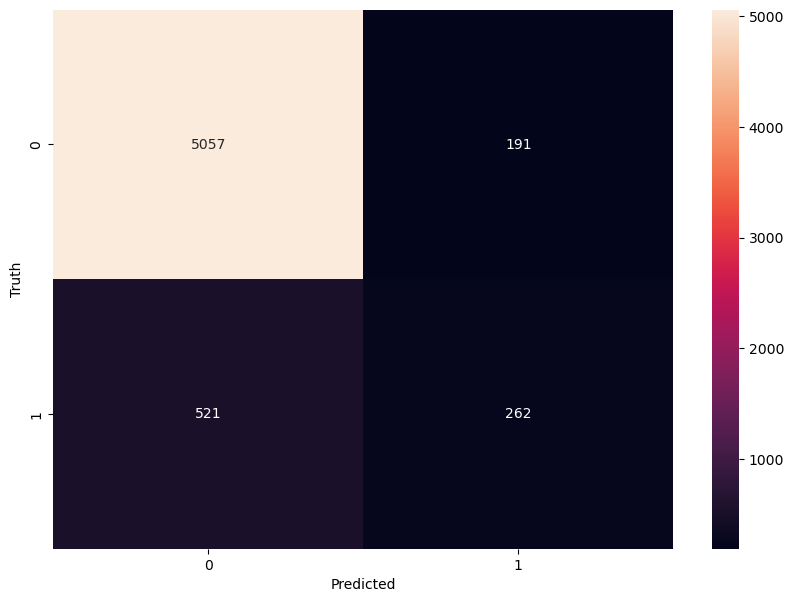

In [377]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [378]:
print(y_test_window.shape)

count_ones = np.count_nonzero(y_test_window == 1)

print("Number of ones in y_test_window:", count_ones)

(6031,)
Number of ones in y_test_window: 783


  1/189 [..............................] - ETA: 6s

189/189 [==============================] - 1s 3ms/step


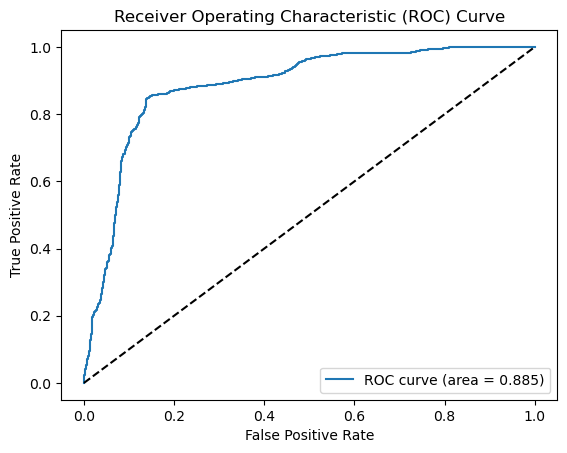

In [379]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브를 그리기 위한 점들을 출력합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 기준선 (diagonal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [380]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# 이진 분류 문제의 경우, 임계값 0.3으로 설정하여 예측값을 0 또는 1로 변환
y_pred = (y_pred > 0.1).astype(int)

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'Macro F1 Score: {f1}')

189/189 [==============================] - 0s 2ms/step
Macro F1 Score: 0.7585713682177979


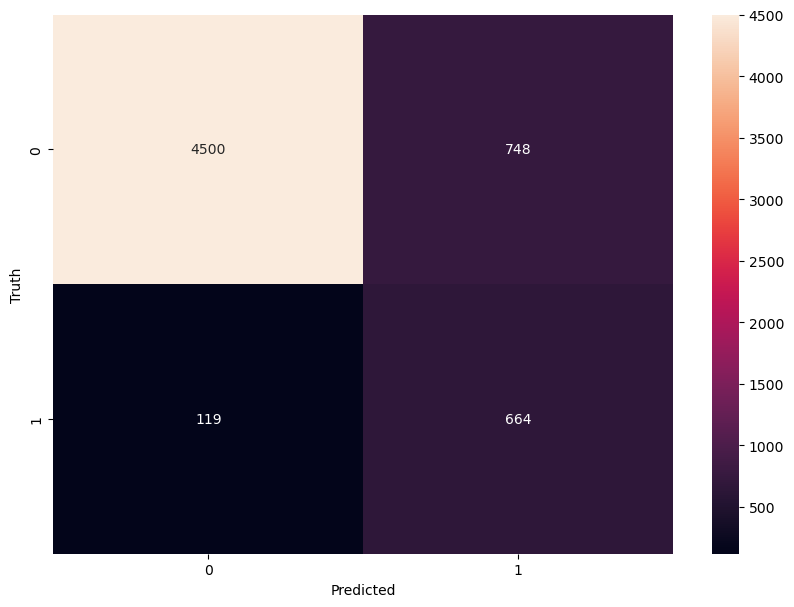

In [381]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [382]:
from numpy import argmax
from sklearn.metrics import roc_curve, classification_report

# 예측 확률 계산
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)

# Youden's J 통계를 사용하여 최적의 임계값 찾기
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f, Sensitivity=%.3f, Specificity=%.3f, J=%.3f' % (best_thresh, tpr[ix], 1-fpr[ix], J[ix]))

# 최적의 임계값을 사용하여 예측 수행
y_pred_class = (y_pred >= best_thresh).astype('int')

# 분류 보고서 출력
print(classification_report(y_test_window, y_pred_class, target_names=['healthy', 'failure']))

189/189 [==============================] - 0s 2ms/step
Best Threshold=0.103824, Sensitivity=0.845, Specificity=0.862, J=0.708
              precision    recall  f1-score   support

     healthy       0.97      0.86      0.91      5248
     failure       0.48      0.85      0.61       783

    accuracy                           0.86      6031
   macro avg       0.73      0.85      0.76      6031
weighted avg       0.91      0.86      0.88      6031



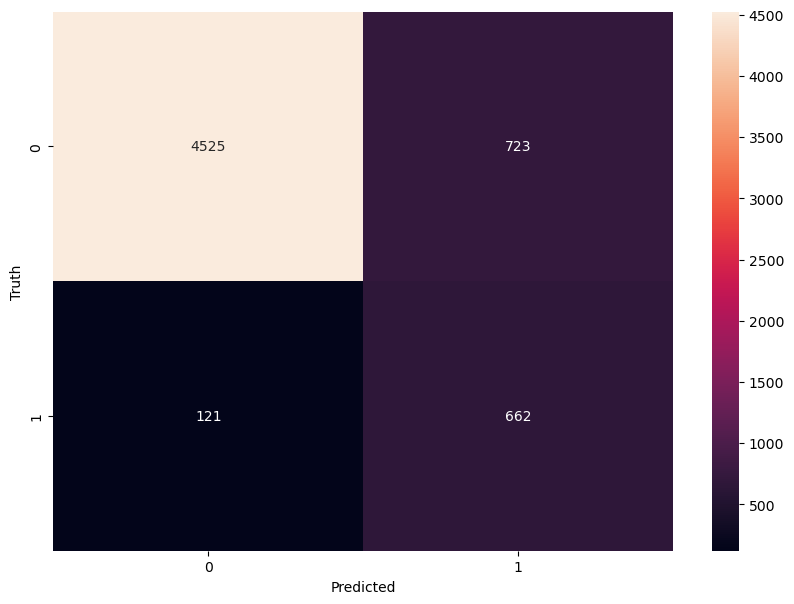

In [383]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred_class)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## LSTM (window = 90)

In [80]:
window_size = 90 # 10일을 window로 설정합니다.
X_train_window, y_trian_window = create_sequences(train_scaled, window_size)
X_test_window, y_test_window = create_sequences(test_scaled, window_size)

print(X_train_window.shape)
print(X_test_window.shape)

print(y_trian_window.shape)
print(y_test_window.shape)


(23804, 90, 32)
(6031, 90, 32)
(23804,)
(6031,)


In [84]:
# 라이브러리 임포트
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
from keras import regularizers

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(90, 32)))  # n_features는 특성의 수
model.add(Dense(32, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

# 학습
history = model.fit(X_train_window,y_trian_window, epochs=15, verbose=1,batch_size=32)

Epoch 1/15
744/744 [==============================] - 14s 18ms/step - loss: 0.3737 - acc: 0.8663
Epoch 2/15
744/744 [==============================] - 14s 19ms/step - loss: 0.3403 - acc: 0.8666
Epoch 3/15
744/744 [==============================] - 14s 18ms/step - loss: 0.3346 - acc: 0.8673
Epoch 4/15
744/744 [==============================] - 14s 18ms/step - loss: 0.3993 - acc: 0.8706
Epoch 5/15
744/744 [==============================] - 14s 19ms/step - loss: 0.3420 - acc: 0.8694
Epoch 6/15
744/744 [==============================] - 15s 20ms/step - loss: 665.6763 - acc: 0.8696
Epoch 7/15
744/744 [==============================] - 15s 20ms/step - loss: 0.3299 - acc: 0.8699
Epoch 8/15
744/744 [==============================] - 15s 20ms/step - loss: 0.3287 - acc: 0.8704
Epoch 9/15
744/744 [==============================] - 14s 19ms/step - loss: 0.3250 - acc: 0.8698
Epoch 10/15
744/744 [==============================] - 14s 19ms/step - loss: 0.4041 - acc: 0.8701
Epoch 11/15
744/744 [======

In [85]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9,409
Trainable params: 9,409
Non-trainable params: 0
_________________________________________________________________


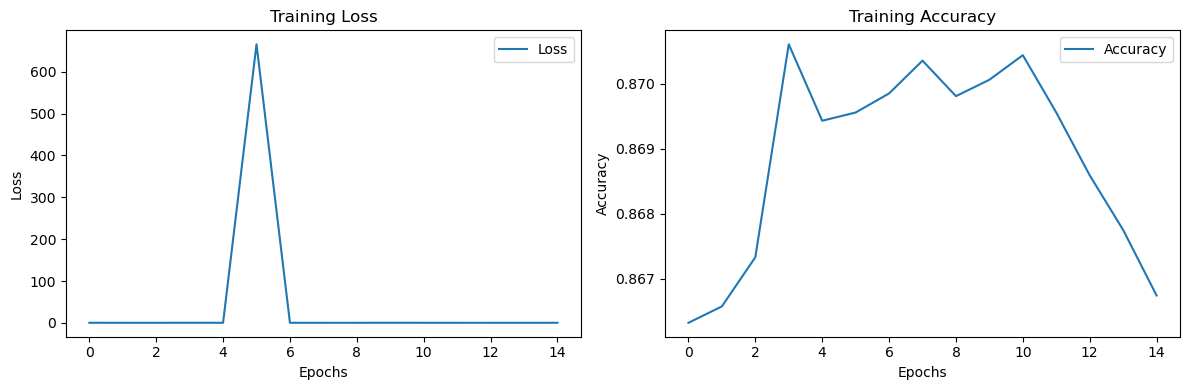

In [86]:
import matplotlib.pyplot as plt

# 훈련 손실과 정확도 그리기
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [87]:
model.evaluate(X_test_window,y_test_window)

189/189 [==============================] - 2s 7ms/step - loss: 0.3199 - acc: 0.8647


[0.31993842124938965, 0.8646990656852722]

In [88]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.
y_pred = np.round(y_pred) # 이진 분류 문제의 경우, 출력값을 반올림하여 0 또는 1로 변환

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'F1 Score: {f1}')

189/189 [==============================] - 1s 7ms/step
F1 Score: 0.5255740777159515


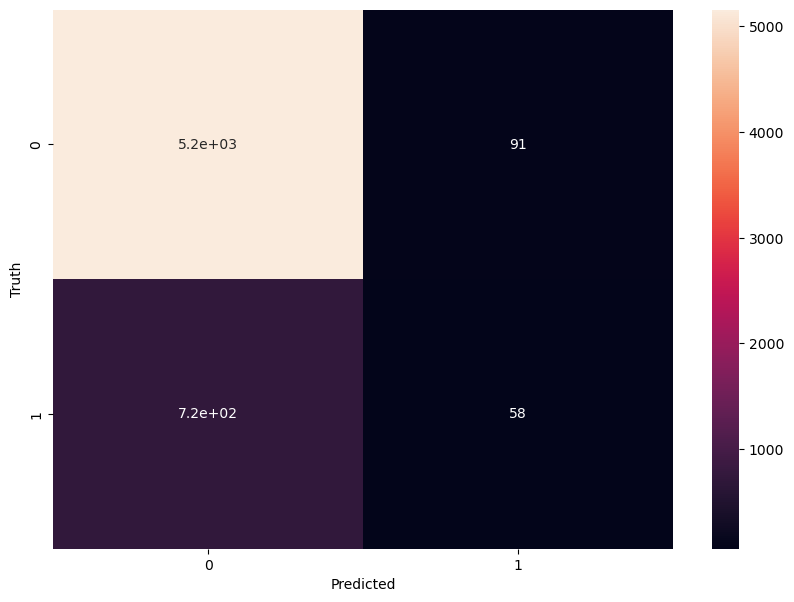

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## LSTM + Attention

In [390]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)

# Assuming 'X_train' is the original DataFrame before scaling and its columns are to be preserved
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

train_scaled = pd.concat([train_set[['disk_id','index']],X_train_scaled_df, y_train], axis=1)
val_scaled = pd.concat([val_set[['disk_id','index']],X_val_scaled_df, y_val], axis=1)

In [391]:
window_size = 90 # 10일을 window로 설정합니다.
X_train_window, y_trian_window = create_sequences(train_scaled, window_size)
X_val_window, y_val_window = create_sequences(val_scaled, window_size)

print(X_train_window.shape)
print(X_val_window.shape)

print(y_trian_window.shape)
print(y_val_window.shape)

(19167, 90, 32)
(4637, 90, 32)
(19167,)
(4637,)


In [264]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

class Attention(Layer):
    def __init__(self, timesteps, **kwargs):
        self.timesteps = timesteps
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(self.timesteps, 1),
                               initializer="zeros")     
        super(Attention, self).build(input_shape)

    def call(self, x):
        et = tf.keras.backend.squeeze(tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b), axis=-1)
        at = tf.keras.backend.softmax(et)
        at = tf.keras.backend.expand_dims(at, axis=-1)
        output = x*at
        return tf.keras.backend.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        base_config = super(Attention, self).get_config()
        base_config.update({"timesteps": self.timesteps})
        return base_config

In [265]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from keras import regularizers

inputs = Input(shape=(90, 32))
lstm_out = LSTM(32, return_sequences=True)(inputs)
attention_out = Attention(90)(lstm_out)
x = Dense(32,  kernel_regularizer=regularizers.l2(0.001))(attention_out)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

In [266]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [267]:
model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 90, 32)]          0         
                                                                 
 lstm_39 (LSTM)              (None, 90, 32)            8320      
                                                                 
 attention_19 (Attention)    (None, 32)                122       
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9,531
Trainable params: 9,531
Non-trainable params: 0
_________________________________________________________________


In [268]:
# 학습
history = model.fit(X_train_window,y_trian_window, validation_data=(X_val_window, y_val_window),epochs=10, verbose=1,batch_size=32)

Epoch 1/10
599/599 [==============================] - 18s 27ms/step - loss: 0.3702 - accuracy: 0.8644 - val_loss: 0.3012 - val_accuracy: 0.8866
Epoch 2/10
599/599 [==============================] - 15s 25ms/step - loss: 0.3449 - accuracy: 0.8648 - val_loss: 0.2944 - val_accuracy: 0.8851
Epoch 3/10
599/599 [==============================] - 15s 25ms/step - loss: 0.3350 - accuracy: 0.8644 - val_loss: 0.2949 - val_accuracy: 0.8851
Epoch 4/10
599/599 [==============================] - 14s 24ms/step - loss: 0.3354 - accuracy: 0.8643 - val_loss: 0.2900 - val_accuracy: 0.8866
Epoch 5/10
599/599 [==============================] - 14s 24ms/step - loss: 0.3290 - accuracy: 0.8654 - val_loss: 0.2814 - val_accuracy: 0.8866
Epoch 6/10
599/599 [==============================] - 15s 26ms/step - loss: 0.3309 - accuracy: 0.8663 - val_loss: 0.2920 - val_accuracy: 0.8866
Epoch 7/10
599/599 [==============================] - 16s 27ms/step - loss: 0.3271 - accuracy: 0.8690 - val_loss: 0.2908 - val_accuracy:

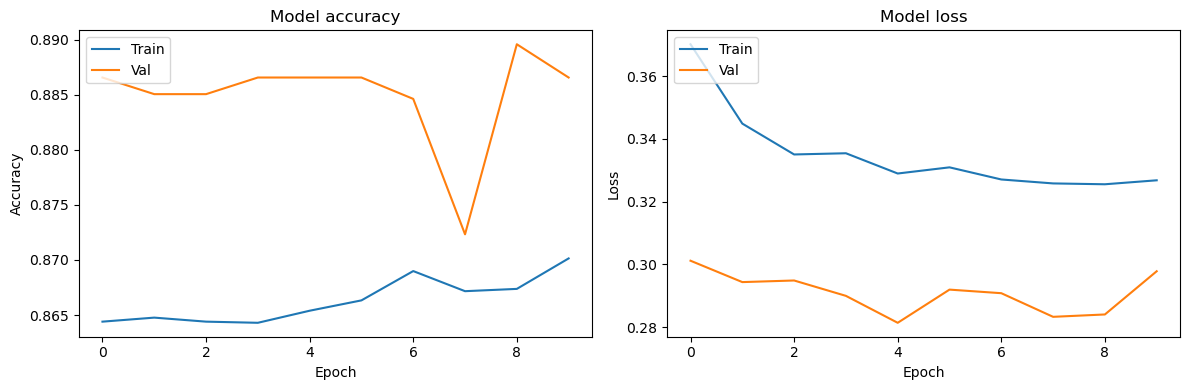

In [269]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

- epoch : 7 에서 최적의 모델 구축가능하다고 판단
- final_X_train(194/194)에 대해서 7 epoch만큼 학습

In [270]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(final_X_train)

final_X_train_scaled=scaler.transform(final_X_train)
X_test_scaled=scaler.transform(X_test)

# Assuming 'final_X_train' is the original DataFrame before scaling and its columns are to be preserved
final_X_train_scaled_df = pd.DataFrame(final_X_train_scaled, columns=final_X_train.columns, index=final_X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

final_train_scaled = pd.concat([final_train_set[['disk_id','index']],final_X_train_scaled_df, final_y_train], axis=1)
test_scaled = pd.concat([test_set[['disk_id','index']],X_test_scaled_df, y_test], axis=1)

In [271]:
window_size = 90 # 10일을 window로 설정합니다.
final_X_train_window, final_y_trian_window = create_sequences(final_train_scaled, window_size)
X_test_window, y_test_window = create_sequences(test_scaled, window_size)

print(final_X_train_window.shape)
print(X_test_window.shape)

print(final_y_trian_window.shape)
print(y_test_window.shape)

(23804, 90, 32)
(6031, 90, 32)
(23804,)
(6031,)


In [304]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from keras import regularizers

inputs = Input(shape=(90, 32))
lstm_out = LSTM(32, return_sequences=True)(inputs)
attention_out = Attention(90)(lstm_out)
x = Dense(32,  kernel_regularizer=regularizers.l2(0.001))(attention_out)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [305]:
# 학습
history = model.fit(final_X_train_window,final_y_trian_window,epochs=5, verbose=1,batch_size=32)

Epoch 1/5
744/744 [==============================] - 19s 22ms/step - loss: 0.3548 - accuracy: 0.8691
Epoch 2/5
744/744 [==============================] - 17s 22ms/step - loss: 0.3505 - accuracy: 0.8684
Epoch 3/5
744/744 [==============================] - 16s 21ms/step - loss: 0.3364 - accuracy: 0.8697
Epoch 4/5
744/744 [==============================] - 18s 24ms/step - loss: 0.3267 - accuracy: 0.8707
Epoch 5/5
744/744 [==============================] - 18s 24ms/step - loss: 0.3262 - accuracy: 0.8688


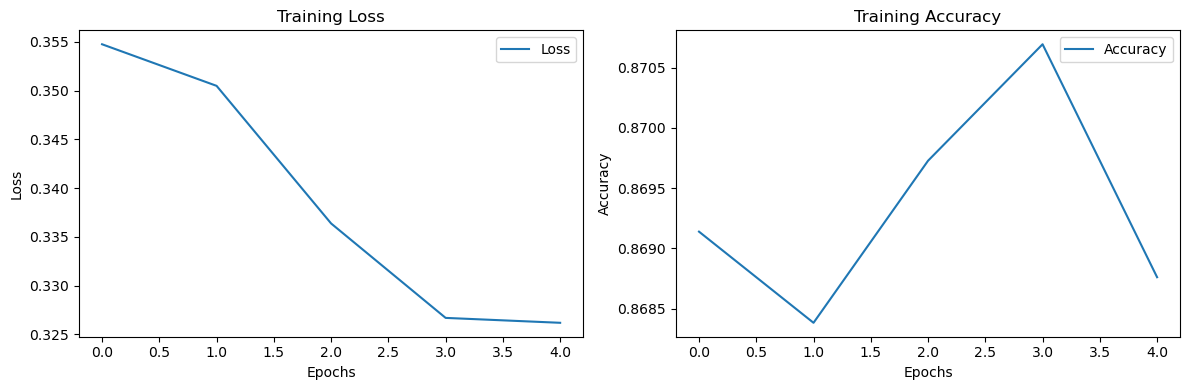

In [306]:
import matplotlib.pyplot as plt

# 훈련 손실과 정확도 그리기
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [307]:
model.evaluate(X_test_window,y_test_window)

189/189 [==============================] - 2s 9ms/step - loss: 0.3128 - accuracy: 0.8725


[0.31281816959381104, 0.8724921345710754]

In [308]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.
y_pred = np.round(y_pred) # 이진 분류 문제의 경우, 출력값을 반올림하여 0 또는 1로 변환

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'F1 Score: {f1}')

189/189 [==============================] - 2s 9ms/step
F1 Score: 0.595051016349837


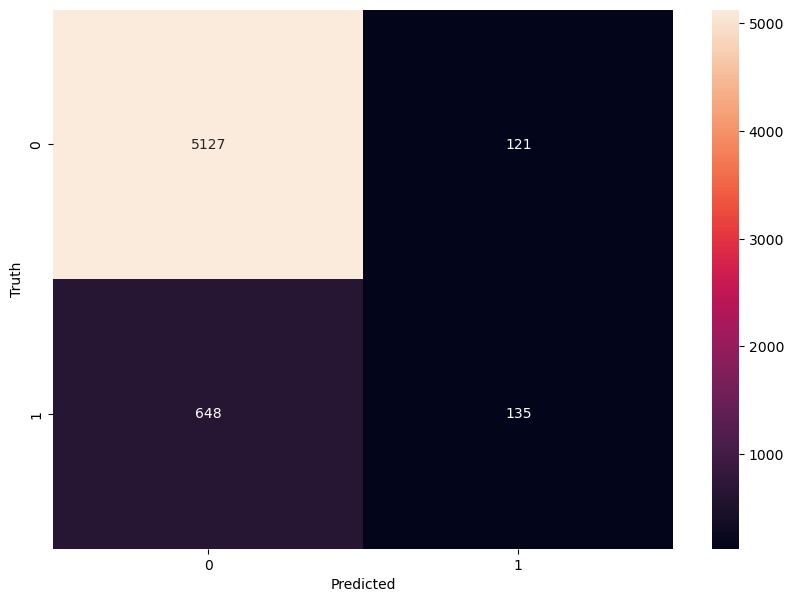

In [309]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

189/189 [==============================] - 2s 9ms/step


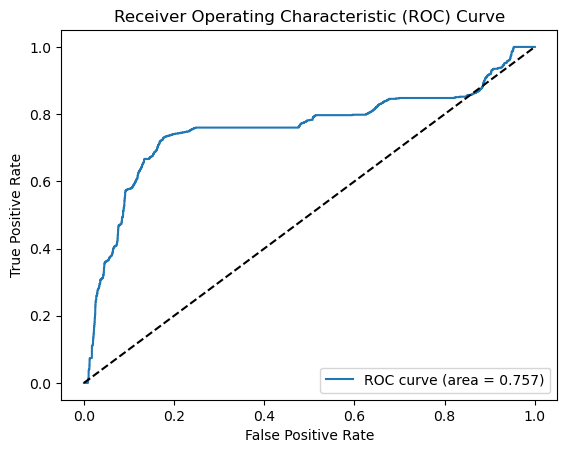

In [310]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브를 그리기 위한 점들을 출력합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 기준선 (diagonal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [311]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# 이진 분류 문제의 경우, 임계값 0.3으로 설정하여 예측값을 0 또는 1로 변환
y_pred = (y_pred > 0.35).astype(int)

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'Macro F1 Score: {f1}')

189/189 [==============================] - 2s 9ms/step
Macro F1 Score: 0.7100234748423226


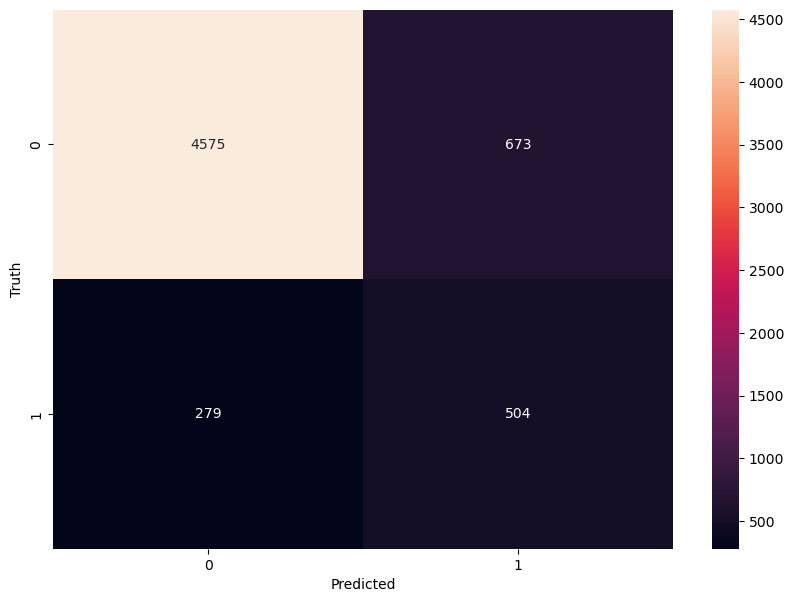

In [312]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [313]:
print(y_test_window.shape)

count_ones = np.count_nonzero(y_test_window == 1)

print("Number of ones in y_test_window:", count_ones)

(6031,)
Number of ones in y_test_window: 783


In [314]:
from numpy import argmax
from sklearn.metrics import roc_curve, classification_report

# 예측 확률 계산
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)

# Youden's J 통계를 사용하여 최적의 임계값 찾기
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f, Sensitivity=%.3f, Specificity=%.3f, J=%.3f' % (best_thresh, tpr[ix], 1-fpr[ix], J[ix]))

# 최적의 임계값을 사용하여 예측 수행
y_pred_class = (y_pred >= best_thresh).astype('int')

# 분류 보고서 출력
print(classification_report(y_test_window, y_pred_class, target_names=['healthy', 'failure']))

189/189 [==============================] - 2s 8ms/step
Best Threshold=0.140540, Sensitivity=0.729, Specificity=0.825, J=0.554
              precision    recall  f1-score   support

     healthy       0.95      0.82      0.88      5248
     failure       0.38      0.73      0.50       783

    accuracy                           0.81      6031
   macro avg       0.67      0.78      0.69      6031
weighted avg       0.88      0.81      0.83      6031



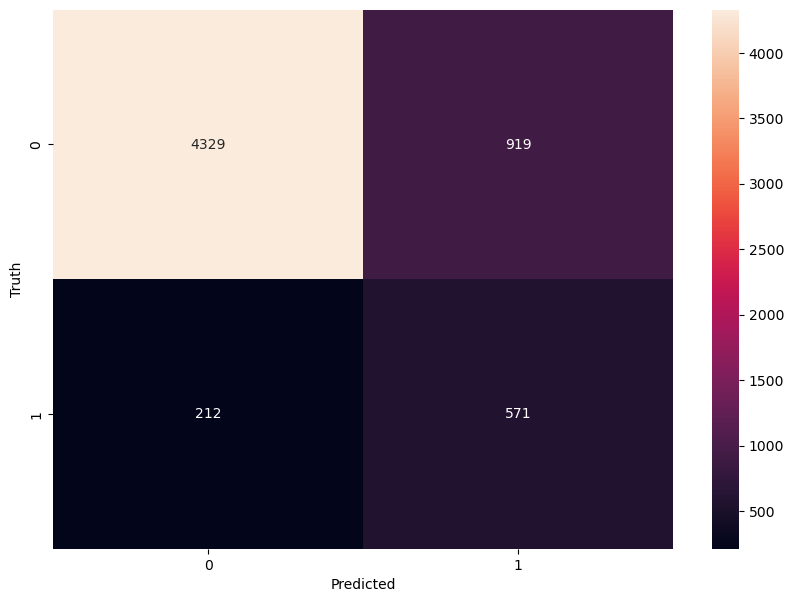

In [315]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred_class)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Conv 1d + LSTM + Attention

In [316]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)

# Assuming 'X_train' is the original DataFrame before scaling and its columns are to be preserved
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

train_scaled = pd.concat([train_set[['disk_id','index']],X_train_scaled_df, y_train], axis=1)
val_scaled = pd.concat([val_set[['disk_id','index']],X_val_scaled_df, y_val], axis=1)

In [317]:
window_size = 90 # 10일을 window로 설정합니다.
X_train_window, y_trian_window = create_sequences(train_scaled, window_size)
X_val_window, y_val_window = create_sequences(val_scaled, window_size)

print(X_train_window.shape)
print(X_val_window.shape)

print(y_trian_window.shape)
print(y_val_window.shape)

(19167, 90, 32)
(4637, 90, 32)
(19167,)
(4637,)


In [318]:
X_train_window = X_train_window.reshape(X_train_window.shape[0], 3, 30, X_train_window.shape[2])
X_val_window = X_val_window.reshape(X_val_window.shape[0], 3, 30, X_val_window.shape[2])

print(X_train_window.shape)
print(X_val_window.shape)

(19167, 3, 30, 32)
(4637, 3, 30, 32)


In [319]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

class Attention(Layer):
    def __init__(self, timesteps, **kwargs):
        self.timesteps = timesteps
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(self.timesteps, 1),
                               initializer="zeros")     
        super(Attention, self).build(input_shape)

    def call(self, x):
        et = tf.keras.backend.squeeze(tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b), axis=-1)
        at = tf.keras.backend.softmax(et)
        at = tf.keras.backend.expand_dims(at, axis=-1)
        output = x*at
        return tf.keras.backend.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        base_config = super(Attention, self).get_config()
        base_config.update({"timesteps": self.timesteps})
        return base_config

In [320]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from keras import regularizers

# 모델 정의input_shape=(None,30, 32)
inputs = Input(shape=(None, 30, 32))
x = TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'))(inputs)
x = TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu'))(x)
#x = TimeDistributed(Dropout(0.5))
x = TimeDistributed(MaxPooling1D(pool_size=2))(x)
x = TimeDistributed(Flatten())(x)
lstm_out = LSTM(32, return_sequences=True)(x)
attention_out = Attention(3)(lstm_out)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(attention_out)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [321]:
model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, None, 30, 32)]    0         
                                                                 
 time_distributed_104 (TimeD  (None, None, 28, 16)     1552      
 istributed)                                                     
                                                                 
 time_distributed_105 (TimeD  (None, None, 26, 32)     1568      
 istributed)                                                     
                                                                 
 time_distributed_106 (TimeD  (None, None, 13, 32)     0         
 istributed)                                                     
                                                                 
 time_distributed_107 (TimeD  (None, None, 416)        0         
 istributed)                                              

In [322]:
# 학습
history = model.fit(X_train_window,y_trian_window, validation_data=(X_val_window, y_val_window),epochs=20, verbose=1,batch_size=32)

Epoch 1/20
599/599 [==============================] - 9s 11ms/step - loss: 0.3672 - accuracy: 0.8640 - val_loss: 0.3104 - val_accuracy: 0.8866
Epoch 2/20
599/599 [==============================] - 7s 11ms/step - loss: 0.3377 - accuracy: 0.8655 - val_loss: 0.2917 - val_accuracy: 0.8866
Epoch 3/20
599/599 [==============================] - 7s 11ms/step - loss: 0.3306 - accuracy: 0.8655 - val_loss: 0.2872 - val_accuracy: 0.8866
Epoch 4/20
599/599 [==============================] - 7s 11ms/step - loss: 0.3244 - accuracy: 0.8675 - val_loss: 0.2916 - val_accuracy: 0.8844
Epoch 5/20
599/599 [==============================] - 7s 11ms/step - loss: 0.3237 - accuracy: 0.8698 - val_loss: 0.2785 - val_accuracy: 0.8872
Epoch 6/20
599/599 [==============================] - 7s 11ms/step - loss: 0.3127 - accuracy: 0.8794 - val_loss: 0.2756 - val_accuracy: 0.8831
Epoch 7/20
599/599 [==============================] - 7s 11ms/step - loss: 0.3074 - accuracy: 0.8847 - val_loss: 0.2844 - val_accuracy: 0.8859

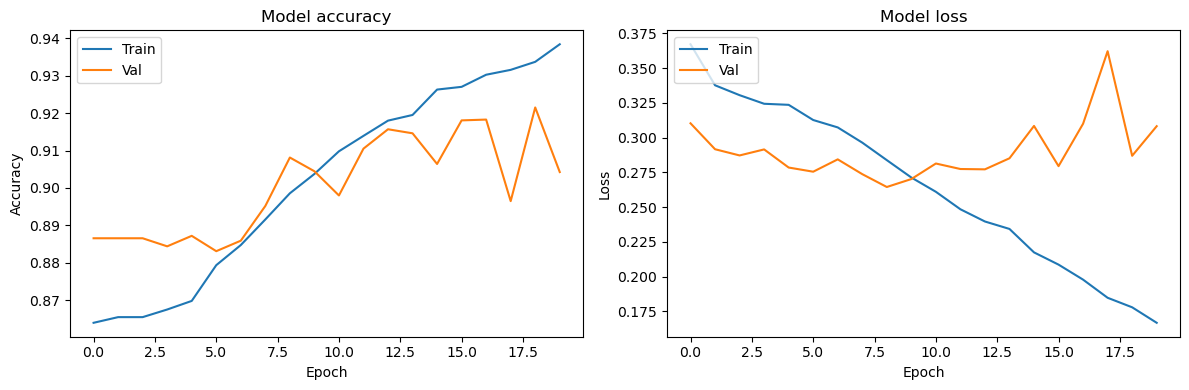

In [323]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

10에폭 0.2525 / 15에폭 0.2528
- 10에폭으로 해보자~

In [324]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(final_X_train)

final_X_train_scaled=scaler.transform(final_X_train)
X_test_scaled=scaler.transform(X_test)

# Assuming 'final_X_train' is the original DataFrame before scaling and its columns are to be preserved
final_X_train_scaled_df = pd.DataFrame(final_X_train_scaled, columns=final_X_train.columns, index=final_X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

final_train_scaled = pd.concat([final_train_set[['disk_id','index']],final_X_train_scaled_df, final_y_train], axis=1)
test_scaled = pd.concat([test_set[['disk_id','index']],X_test_scaled_df, y_test], axis=1)

In [325]:
window_size = 90 # 10일을 window로 설정합니다.
final_X_train_window, final_y_trian_window = create_sequences(final_train_scaled, window_size)
X_test_window, y_test_window = create_sequences(test_scaled, window_size)

print(final_X_train_window.shape)
print(X_test_window.shape)

print(final_y_trian_window.shape)
print(y_test_window.shape)

(23804, 90, 32)
(6031, 90, 32)
(23804,)
(6031,)


In [326]:
final_X_train_window = final_X_train_window.reshape(final_X_train_window.shape[0], 3, 30, final_X_train_window.shape[2])
X_test_window = X_test_window.reshape(X_test_window.shape[0], 3, 30, X_test_window.shape[2])

print(final_X_train_window.shape)
print(X_test_window.shape)

(23804, 3, 30, 32)
(6031, 3, 30, 32)


In [328]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from keras import regularizers

# 모델 정의input_shape=(None,30, 32)
inputs = Input(shape=(None, 30, 32))
x = TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'))(inputs)
x = TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu'))(x)
#x = TimeDistributed(Dropout(0.5))
x = TimeDistributed(MaxPooling1D(pool_size=2))(x)
x = TimeDistributed(Flatten())(x)
lstm_out = LSTM(32, return_sequences=True)(x)
attention_out = Attention(3)(lstm_out)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(attention_out)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# 학습
history = model.fit(final_X_train_window,final_y_trian_window,epochs=9, verbose=1,batch_size=32)

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, None, 30, 32)]    0         
                                                                 
 time_distributed_112 (TimeD  (None, None, 28, 16)     1552      
 istributed)                                                     
                                                                 
 time_distributed_113 (TimeD  (None, None, 26, 32)     1568      
 istributed)                                                     
                                                                 
 time_distributed_114 (TimeD  (None, None, 13, 32)     0         
 istributed)                                                     
                                                                 
 time_distributed_115 (TimeD  (None, None, 416)        0         
 istributed)                                              

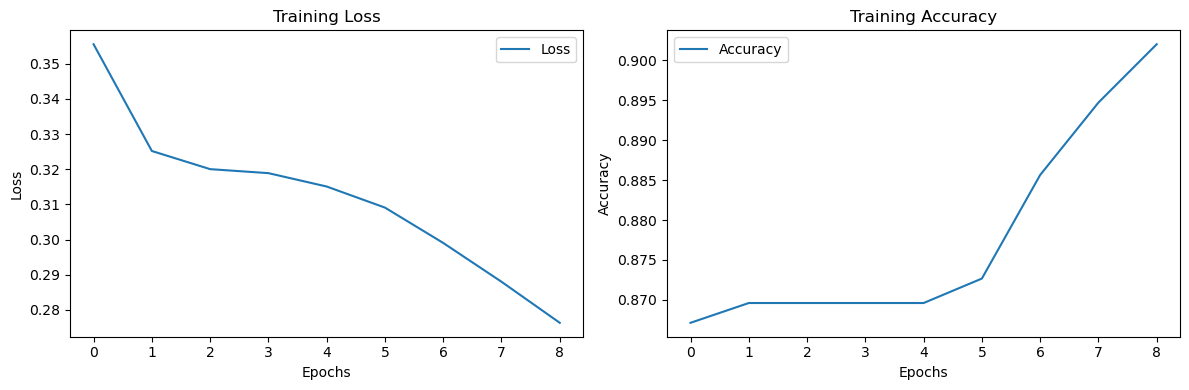

In [329]:
import matplotlib.pyplot as plt

# 훈련 손실과 정확도 그리기
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [330]:
model.evaluate(X_test_window,y_test_window)

189/189 [==============================] - 1s 4ms/step - loss: 0.2804 - accuracy: 0.8843


[0.28040024638175964, 0.8842646479606628]

In [331]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.
y_pred = np.round(y_pred) # 이진 분류 문제의 경우, 출력값을 반올림하여 0 또는 1로 변환

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'F1 Score: {f1}')

189/189 [==============================] - 1s 4ms/step
F1 Score: 0.7122479184370751


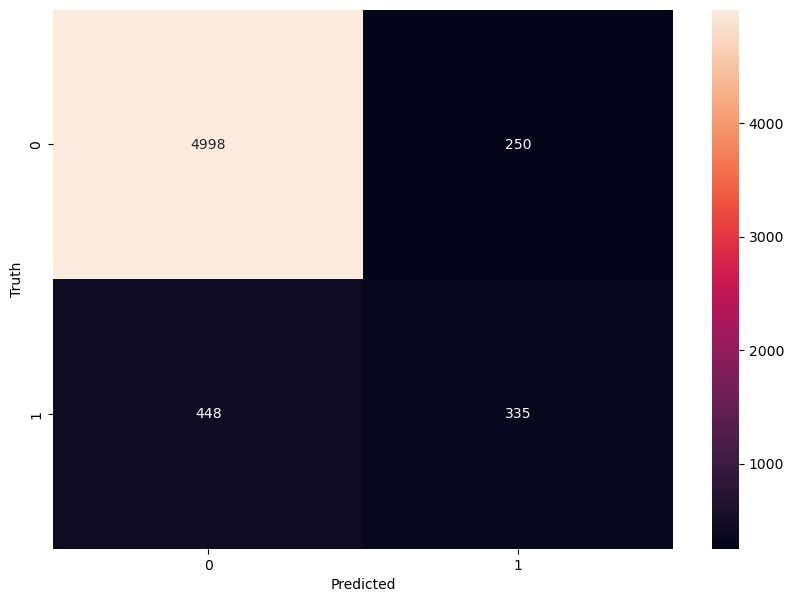

In [332]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

189/189 [==============================] - 1s 4ms/step


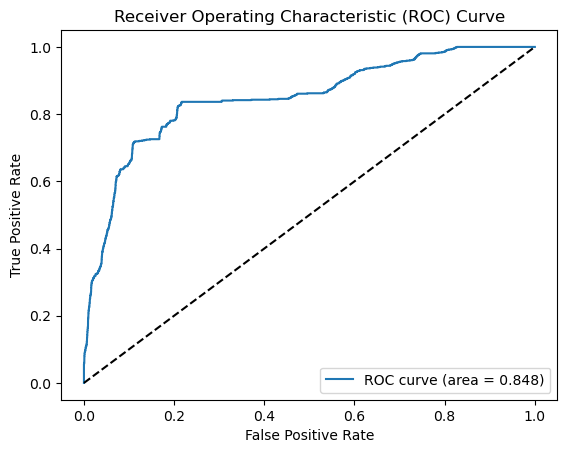

In [333]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브를 그리기 위한 점들을 출력합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 기준선 (diagonal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [342]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# 이진 분류 문제의 경우, 임계값 0.3으로 설정하여 예측값을 0 또는 1로 변환
y_pred = (y_pred > 0.35).astype(int)

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'Macro F1 Score: {f1}')

189/189 [==============================] - 1s 4ms/step
Macro F1 Score: 0.7448160489833261


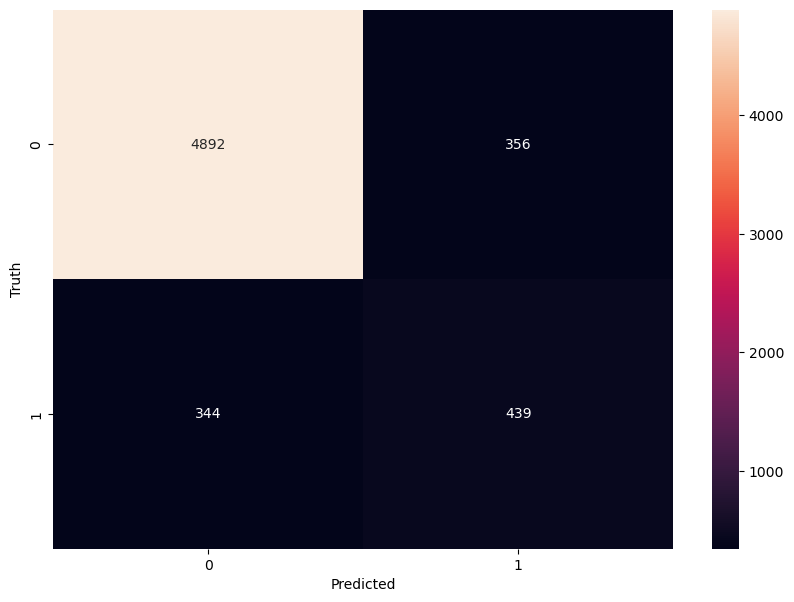

In [343]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [336]:
from numpy import argmax
from sklearn.metrics import roc_curve, classification_report

# 예측 확률 계산
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)

# Youden's J 통계를 사용하여 최적의 임계값 찾기
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f, Sensitivity=%.3f, Specificity=%.3f, J=%.3f' % (best_thresh, tpr[ix], 1-fpr[ix], J[ix]))

# 최적의 임계값을 사용하여 예측 수행
y_pred_class = (y_pred >= best_thresh).astype('int')

# 분류 보고서 출력
print(classification_report(y_test_window, y_pred_class, target_names=['healthy', 'failure']))

189/189 [==============================] - 1s 4ms/step
Best Threshold=0.070733, Sensitivity=0.837, Specificity=0.783, J=0.620
              precision    recall  f1-score   support

     healthy       0.97      0.78      0.87      5248
     failure       0.37      0.84      0.51       783

    accuracy                           0.79      6031
   macro avg       0.67      0.81      0.69      6031
weighted avg       0.89      0.79      0.82      6031



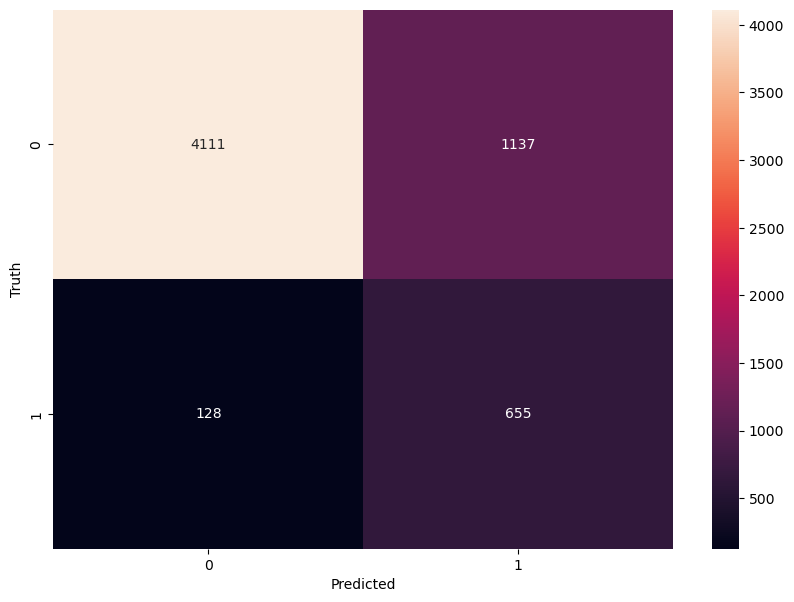

In [337]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred_class)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## CNN + LSTM + SelfAttention? 만드는중,,,

In [359]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import MultiHeadAttention
from keras import regularizers

inputs = Input(shape=(None, 30, 32))
x = TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'))(inputs)
x = TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu'))(x)
x = TimeDistributed(MaxPooling1D(pool_size=2))(x)
x = TimeDistributed(Flatten())(x)
lstm_out = LSTM(32, return_sequences=True)(x)
attention_out = MultiHeadAttention(num_heads=10, key_dim=2)(lstm_out, lstm_out)
x = TimeDistributed(Dense(32, activation='relu'))(x)
x = GlobalAveragePooling1D()(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [360]:
model.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, None, 30, 32)]    0         
                                                                 
 time_distributed_121 (TimeD  (None, None, 28, 16)     1552      
 istributed)                                                     
                                                                 
 time_distributed_122 (TimeD  (None, None, 26, 32)     1568      
 istributed)                                                     
                                                                 
 time_distributed_123 (TimeD  (None, None, 13, 32)     0         
 istributed)                                                     
                                                                 
 time_distributed_124 (TimeD  (None, None, 416)        0         
 istributed)                                              

In [361]:
# 학습
history = model.fit(final_X_train_window,final_y_trian_window,epochs=10, verbose=1,batch_size=32)

Epoch 1/10
744/744 [==============================] - 5s 6ms/step - loss: 0.3456 - accuracy: 0.8691
Epoch 2/10
744/744 [==============================] - 4s 6ms/step - loss: 0.3272 - accuracy: 0.8691
Epoch 3/10
744/744 [==============================] - 4s 6ms/step - loss: 0.3217 - accuracy: 0.8686
Epoch 4/10
744/744 [==============================] - 4s 6ms/step - loss: 0.3158 - accuracy: 0.8691
Epoch 5/10
744/744 [==============================] - 4s 5ms/step - loss: 0.3119 - accuracy: 0.8691
Epoch 6/10
744/744 [==============================] - 4s 5ms/step - loss: 0.3036 - accuracy: 0.8727
Epoch 7/10
744/744 [==============================] - 4s 5ms/step - loss: 0.2971 - accuracy: 0.8719
Epoch 8/10
744/744 [==============================] - 4s 5ms/step - loss: 0.2907 - accuracy: 0.8751
Epoch 9/10
744/744 [==============================] - 4s 6ms/step - loss: 0.2804 - accuracy: 0.8790
Epoch 10/10
744/744 [==============================] - 4s 6ms/step - loss: 0.2746 - accuracy: 0.8843

189/189 [==============================] - 0s 2ms/step


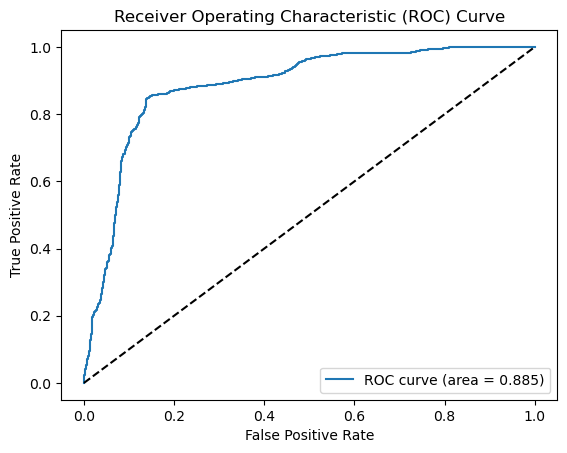

In [362]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브를 그리기 위한 점들을 출력합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 기준선 (diagonal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [363]:
from sklearn.metrics import f1_score

# 테스트 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# 이진 분류 문제의 경우, 임계값 0.1으로 설정하여 예측값을 0 또는 1로 변환
y_pred = (y_pred > 0.1).astype(int)

# f1 score 계산
f1 = f1_score(y_test_window, y_pred, average='macro') # y_test_window는 테스트 데이터셋의 실제 레이블이어야 합니다.

print(f'Macro F1 Score: {f1}')

189/189 [==============================] - 0s 2ms/step
Macro F1 Score: 0.7585713682177979


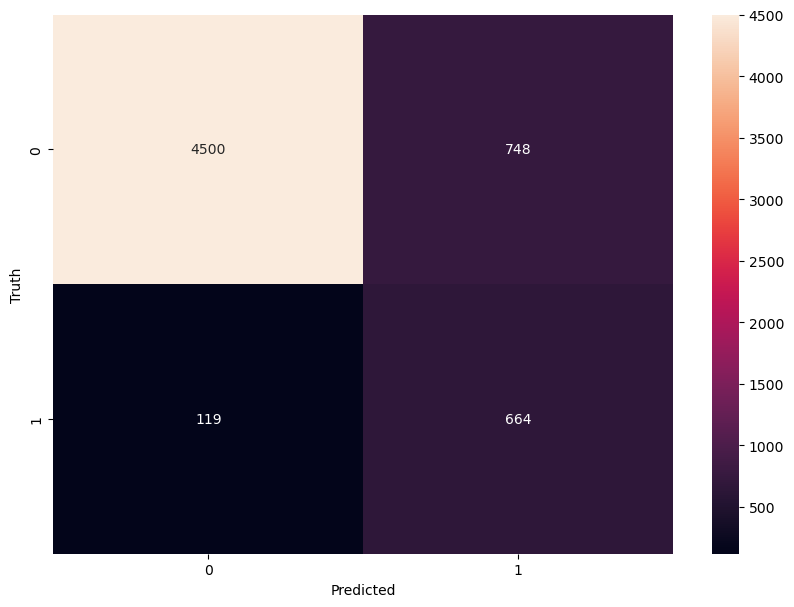

In [364]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [365]:
from numpy import argmax
from sklearn.metrics import roc_curve, classification_report

# 예측 확률 계산
y_pred = model.predict(X_test_window) # X_test_window는 테스트 데이터셋의 입력 특성이어야 합니다.

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test_window, y_pred)

# Youden's J 통계를 사용하여 최적의 임계값 찾기
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f, Sensitivity=%.3f, Specificity=%.3f, J=%.3f' % (best_thresh, tpr[ix], 1-fpr[ix], J[ix]))

# 최적의 임계값을 사용하여 예측 수행
y_pred_class = (y_pred >= best_thresh).astype('int')

# 분류 보고서 출력
print(classification_report(y_test_window, y_pred_class, target_names=['healthy', 'failure']))

189/189 [==============================] - 0s 2ms/step
Best Threshold=0.103824, Sensitivity=0.845, Specificity=0.862, J=0.708
              precision    recall  f1-score   support

     healthy       0.97      0.86      0.91      5248
     failure       0.48      0.85      0.61       783

    accuracy                           0.86      6031
   macro avg       0.73      0.85      0.76      6031
weighted avg       0.91      0.86      0.88      6031



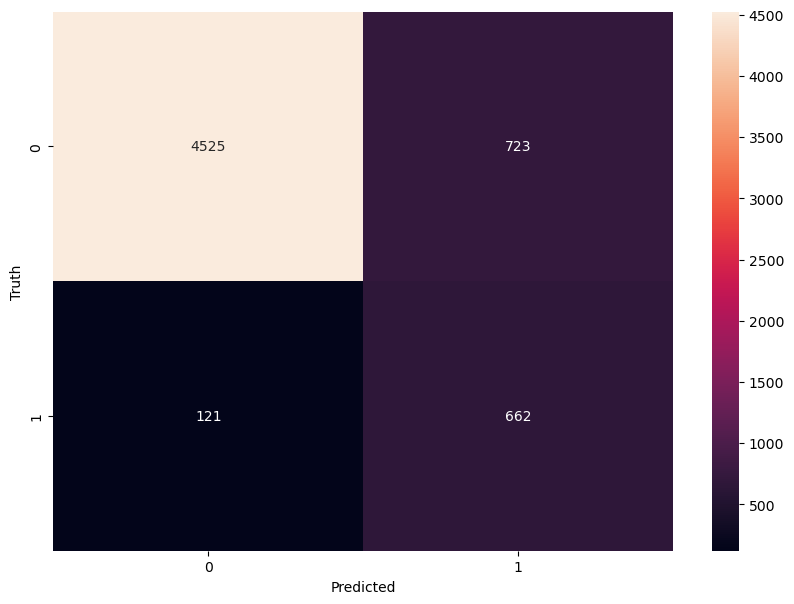

In [369]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_window, y_pred_class)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [387]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import MultiHeadAttention
from keras import regularizers

inputs = Input(shape=(None, 30, 32))
x = TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu'))(inputs)
x = TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu'))(x)
x = TimeDistributed(MaxPooling1D(pool_size=2))(x)
x = TimeDistributed(Flatten())(x)
lstm_out = LSTM(32, return_sequences=True)(x)
attention_out, attn_weights = MultiHeadAttention(num_heads=10, key_dim=2, return_attention_scores=True)(lstm_out, lstm_out)
x = TimeDistributed(Dense(32, activation='relu'))(attention_out)
x = GlobalAveragePooling1D()(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
outputs = Dense(1, activation='sigmoid')(x)

mulheadatt_model = Model(inputs=inputs, outputs=[outputs, attn_weights])

mulheadatt_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

TypeError: ('Keyword argument not understood:', 'return_attention_scores')